# HOUSE PRICE PREDICTION

HOUSE PRICE PREDICTION
In this project, we utilize machine learning techniques to develop a predictive model for house prices. By leveraging data-driven approaches, the model identifies patterns and relationships in historical data to generate reliable predictions. This can assist stakeholders in making informed decisions, optimizing investments, and understanding market dynamics more effectively.

Our objective is to:

Analyze the factors influencing house prices.
Build a robust and efficient predictive model using datasets.
Validate and evaluate the model to ensure accuracy and scalability.

## Import Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import skew
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")

## Load Dataset

In [6]:
df=pd.read_csv('data.csv')

In [7]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Domain analysis


Objective: Predict the price of a house based on various factors. There are 81 columns such as:

Size: Total area (in square feet or meters).
Rooms: Number of bedrooms, bathrooms, and other rooms.
Age: Year built or the age of the house.
Condition: Renovation status or maintenance quality.
Amenities: Swimming pools, garages, gardens, home offices. and many more...

## Basic Checks

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**There are so many null values in the dataset and  multiple datatypes**

In [13]:
df.shape

(1460, 81)

**There are 1460 rows and 81 Columns**

In [15]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [16]:
df.tail(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [18]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [19]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [20]:
df['SalePrice'].value_counts()

SalePrice
140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: count, Length: 663, dtype: int64

**We have continuous columns in our Target column: SalesPrice**

In [22]:
max_value = df['SalePrice'].max()
min_value = df['SalePrice'].min()

# Print the results
print(f"Maximum value in column 'Salerice': {max_value}")
print(f"Minimum value in column 'SalePrice': {min_value}")

Maximum value in column 'Salerice': 755000
Minimum value in column 'SalePrice': 34900


## EDA

In [24]:
df['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

<Axes: xlabel='Street', ylabel='SalePrice'>

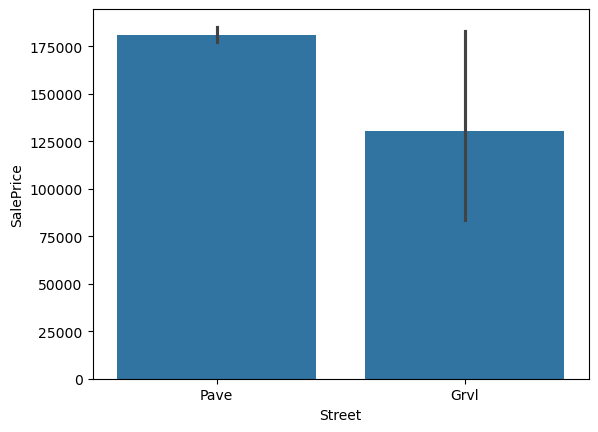

In [25]:
sns.barplot(x=df['Street'],y=df['SalePrice'])

**The price of the house is maximum on Pave Street**

<Axes: xlabel='SalePrice', ylabel='Count'>

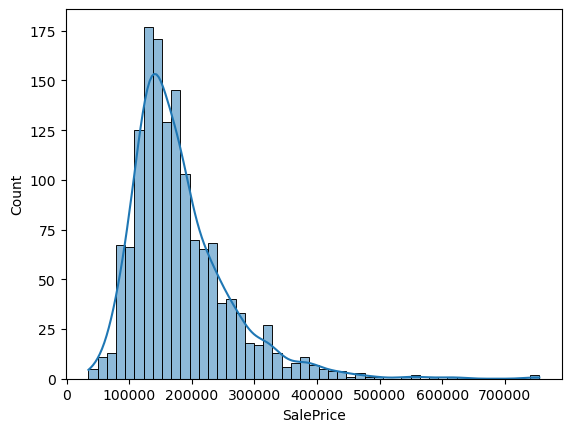

In [27]:
sns.histplot(df['SalePrice'],kde=True)

**Target column(SalesPrice) is highly right skewed**

Text(0.5, 1.0, 'Above Ground Living Area vs SalePrice')

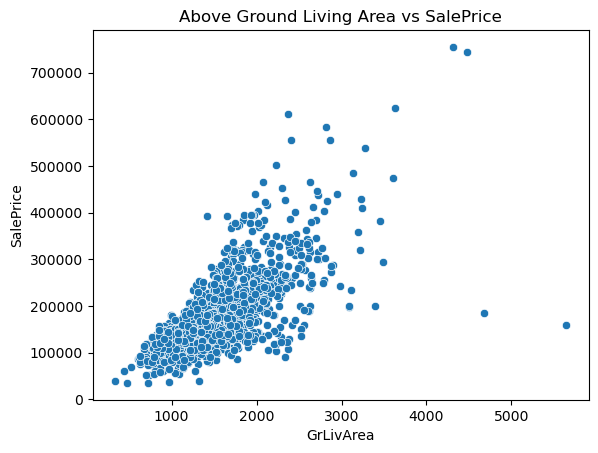

In [29]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title("Above Ground Living Area vs SalePrice")

**The House Price is minimum on 5000 Ground Live Area and Maximum on 1000 Ground Live Area**

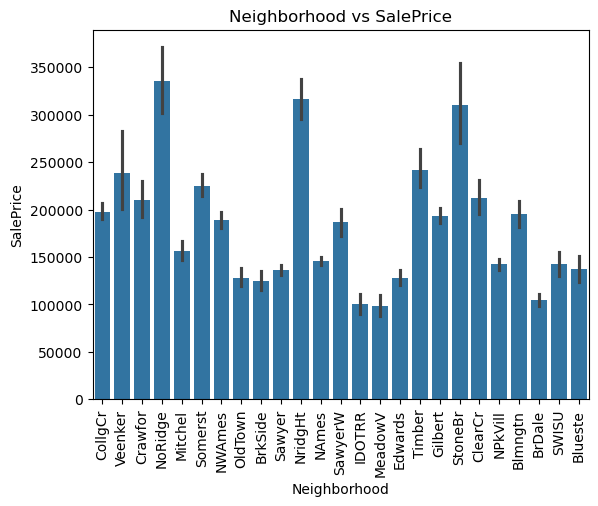

In [31]:
sns.barplot(x='Neighborhood', y='SalePrice', data=df)
plt.title("Neighborhood vs SalePrice")
plt.xticks(rotation=90)
plt.xlabel("Neighborhood")
plt.ylabel("SalePrice")
plt.show()

**The Price of House is minimum near Meadow Neighborhood and highest price at NoRidge Neighborhood**

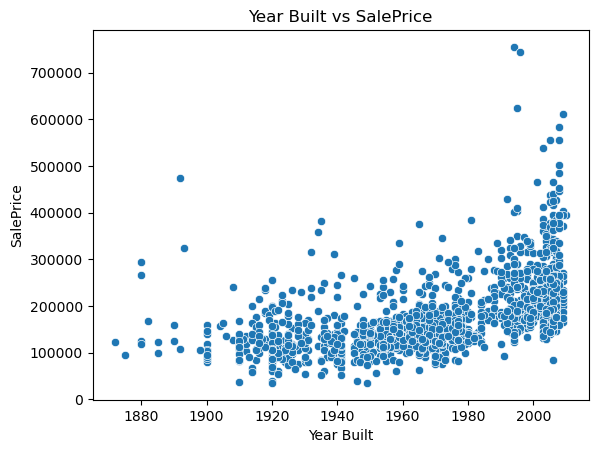

In [33]:
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df)
plt.title("Year Built vs SalePrice")
plt.xlabel("Year Built")
plt.ylabel("SalePrice")
plt.show()

**The Price of House is maximum which are built in 2000th year and minimum which are built in 1880th year**

In [35]:
df['BedroomAbvGr'].value_counts()

BedroomAbvGr
3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: count, dtype: int64

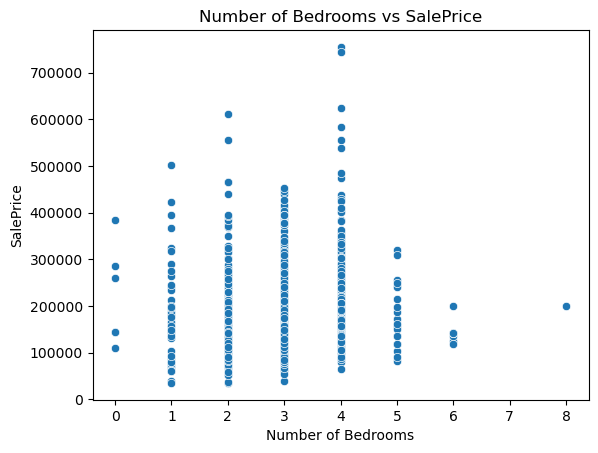

In [36]:
sns.scatterplot(x='BedroomAbvGr', y='SalePrice', data=df)
plt.title("Number of Bedrooms vs SalePrice")
plt.xlabel("Number of Bedrooms")
plt.ylabel("SalePrice")
plt.show()

**The Price of House is maximum which contain 4 bedrooms**

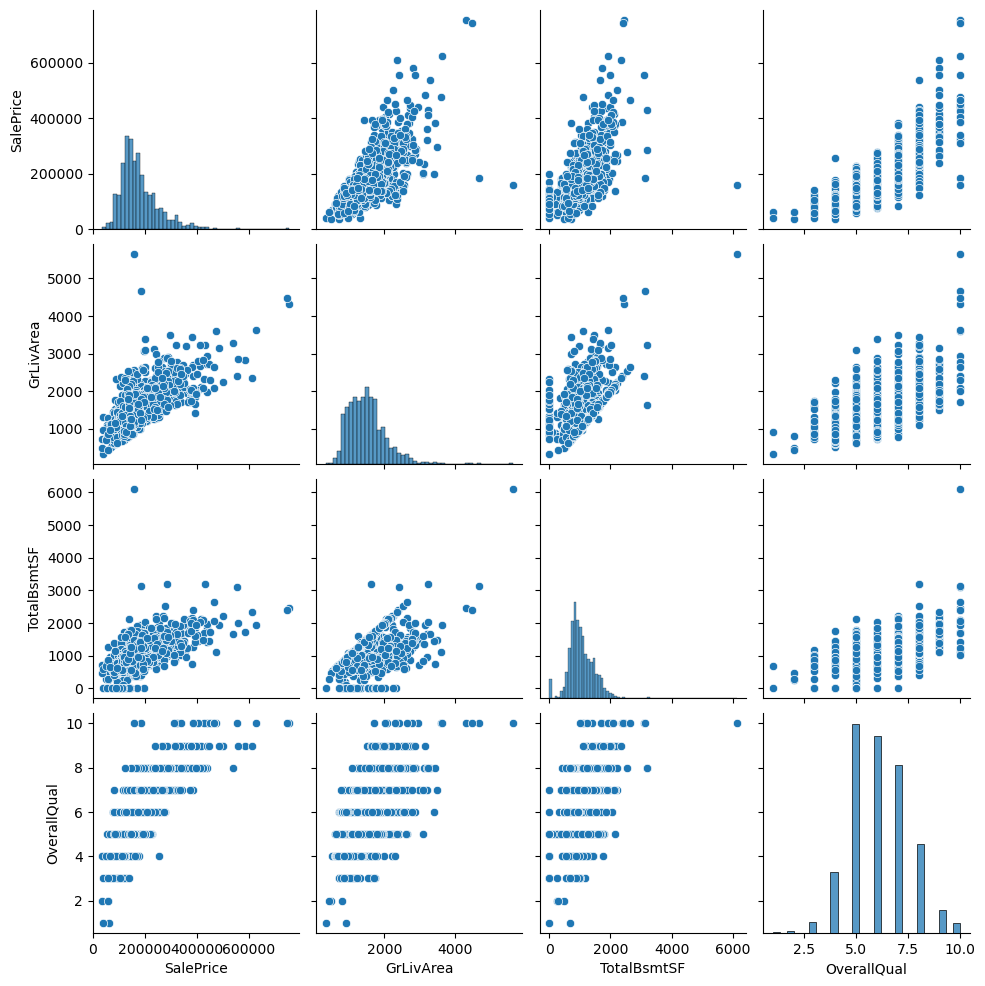

In [38]:
sns.pairplot(df[['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'OverallQual']])

## Data preprocessing and Feature engineering

In [40]:
missing_val= df.isnull().sum()
missing_val= missing_val[missing_val>0]
print(missing_val)
print("There are",len(missing_val),"columns are having null values")

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
There are 19 columns are having null values


In [41]:
# Dropping columns that has more than 70% Null values.
df = df.drop(columns=['Alley','PoolQC','Fence', 'MiscFeature'],axis=1)

In [42]:
# Numerical Columns with NULL values...
num_col_na = [column for column in df.columns if (df[column].isnull().sum()>0) and (df[column].dtype != 'O')]
print(num_col_na)
print(len(num_col_na))

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
3


In [43]:
# Filling Mean of that perticular column in Numerical values
for column in num_col_na:
  df[column] = df[column].fillna(df[column].mean())


In [44]:
#Categorical Columns with NULL Values...
cate_col_na = [column for column in df.columns if (df[column].isnull().sum()>0) and (df[column].dtype == 'O')]
print(cate_col_na)
print(len(cate_col_na))

['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
12


In [45]:
# Filling "Mode" in place of NULL values in Categorical columns
for column in cate_col_na:
 df[column] = df[column].fillna(df[column].mode().iloc[0])

In [46]:
missing_val= df.isnull().sum()
missing_val= missing_val[missing_val>0]
print(missing_val)

Series([], dtype: int64)


**Now there is no null values**

In [48]:
df.shape

(1460, 77)

In [49]:
# Separate numerical columns
num_col = df.select_dtypes(include=['number'])

# Print the results
print("Numerical Columns:", num_col)
print(len(num_col))

Numerical Columns:         Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003   

In [50]:
# Separate categorical columns
cat_col = df.select_dtypes(include=['object'])

# Print the results
print("Categorical Columns:", cat_col)
print(len(cat_col))

Categorical Columns:      MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1455       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2  ... KitchenQual Functional  \
0      

In [51]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

**There is no duplicated values in the dataset**

In [53]:
num_col.head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500


In [54]:
num_col.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.384950
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.676412
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.668175
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

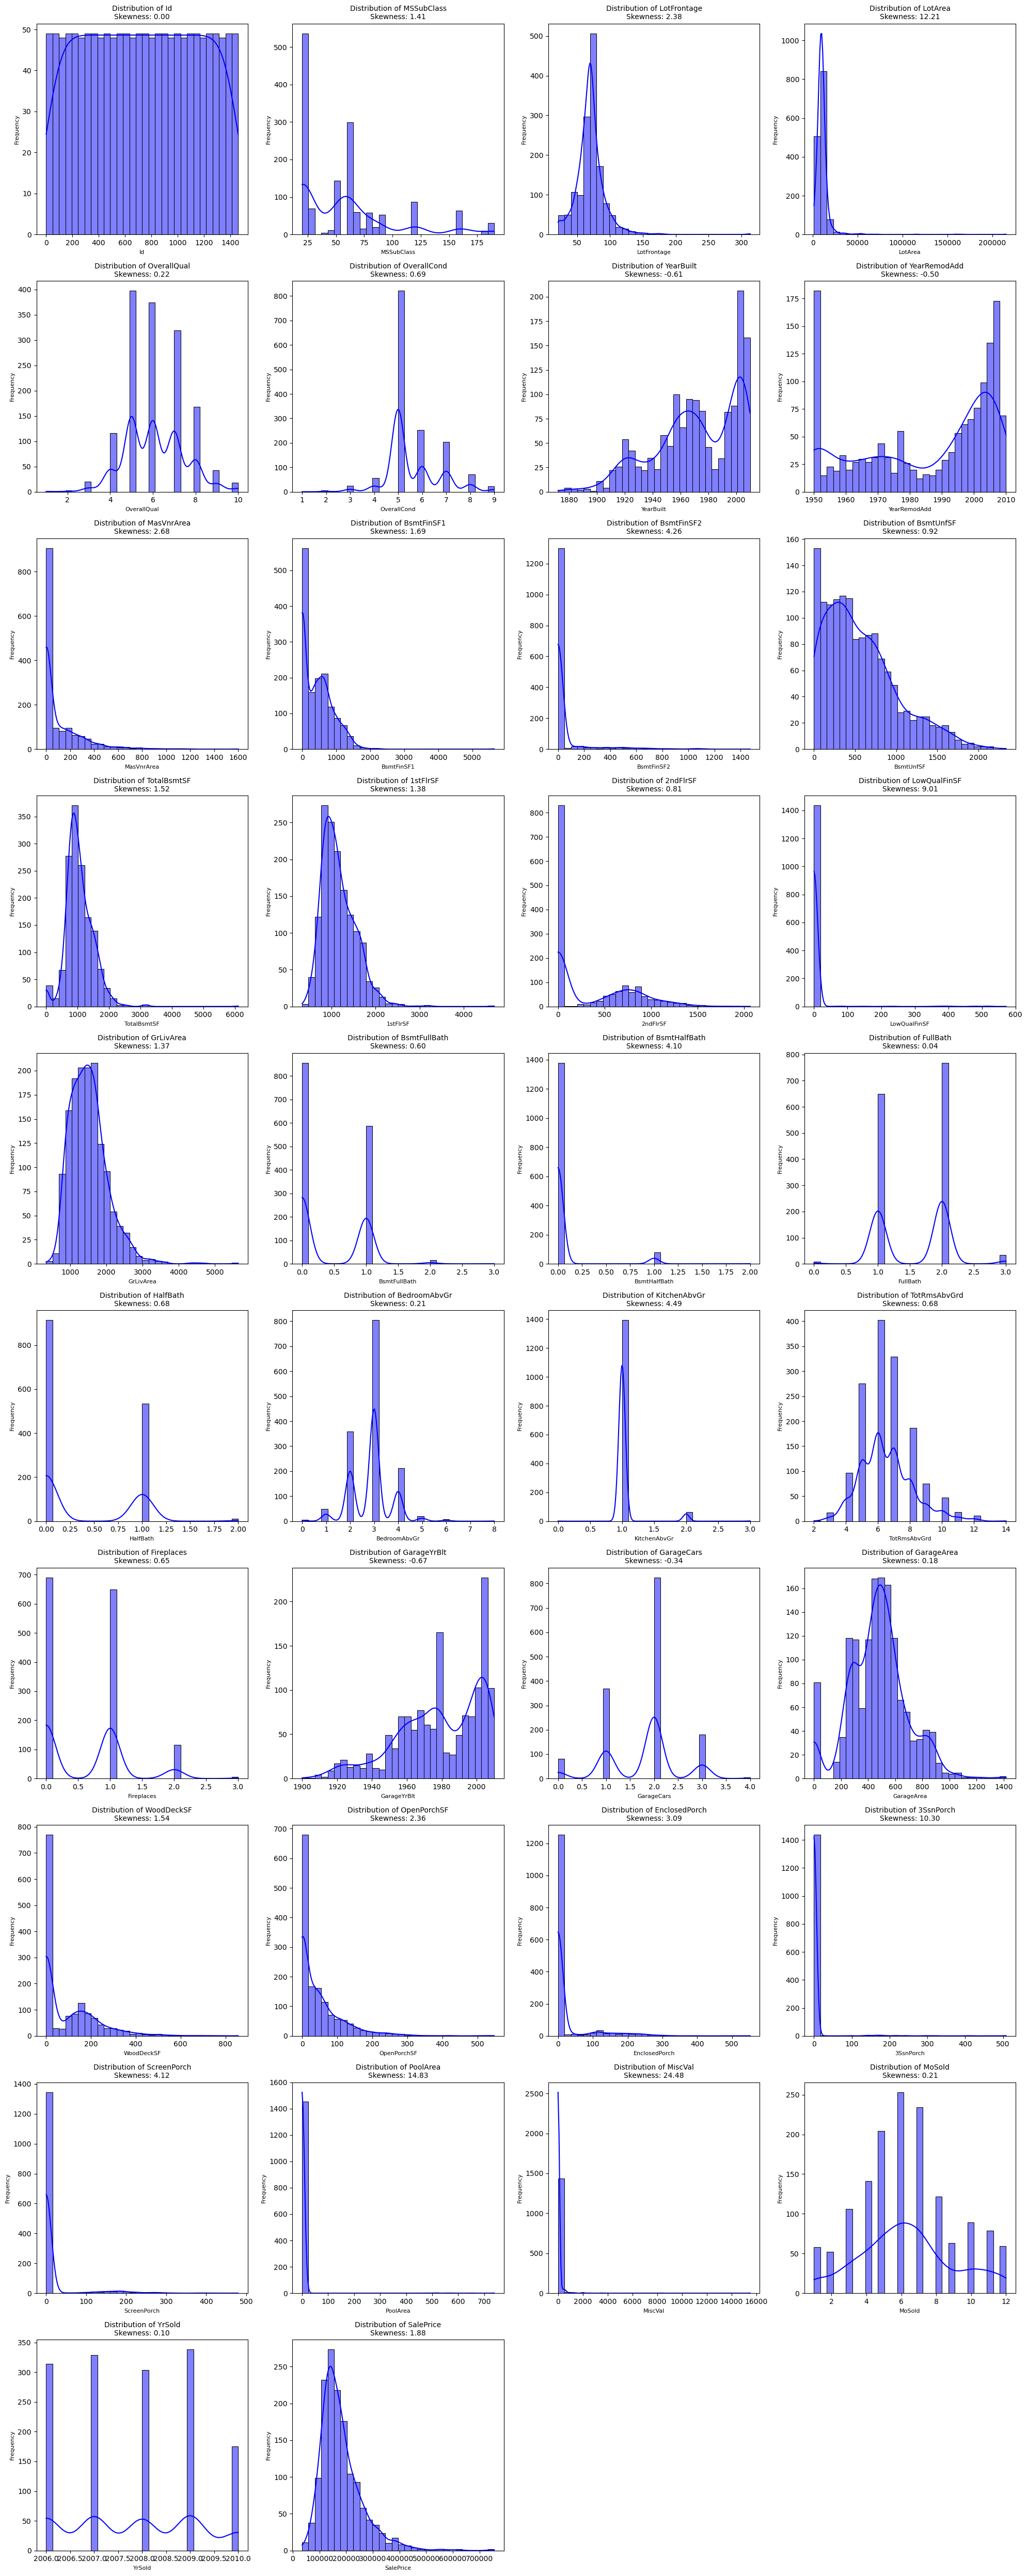

In [55]:
import matplotlib.pyplot as plt
import math

# Determine the number of rows and columns for subplots
n_cols = 4  # Number of columns in the grid
n_rows = math.ceil(len(num_col.columns) / n_cols)  # Calculate rows based on the number of columns

plt.figure(figsize=(20, n_rows * 5))  # Adjust figure size based on rows

# Create subplots for each column
plot = 1
for col in num_col.columns:
    plt.subplot(n_rows, n_cols, plot)  # Create a grid of n_rows x n_cols
    sns.histplot(num_col[col], kde=True, bins=30, color='blue')  # Plot distribution
    plt.title(f'Distribution of {col}\nSkewness: {num_col[col].skew():.2f}', fontsize=10)
    plt.xlabel(col, fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
    plot += 1

plt.tight_layout()  # Adjust spacing between plots
plt.show()

**There are lots of columns which are highly skewed, we have to remove the skewness**

In [57]:
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

# Function to apply transformations based on skewness
def transform_skewed_columns(num_col, skewness_threshold=1):
    skewed_columns = num_col.skew().sort_values(ascending=False)
    transformations = {}

    for col in skewed_columns.index:
        skew_value = skewed_columns[col]
        if skew_value > skewness_threshold:  # High skewness
            if (num_col[col] > 0).all():  # Log transformation for positive values
                num_col[col] = np.log1p(num_col[col])  # log1p handles log(0)
                transformations[col] = "Log"
            else:  # Yeo-Johnson for negative/zero values
                pt = PowerTransformer(method='yeo-johnson')
                num_col[col] = pt.fit_transform(num_col[[col]])
                transformations[col] = "Yeo-Johnson"
        elif skew_value > 0.5:  # Moderate skewness
            if (num_col[col] >= 0).all():  # Square root for non-negative values
                num_col[col] = np.sqrt(num_col[col])
                transformations[col] = "Square Root"
        elif skew_value < -skewness_threshold:  # Negative skewness
            num_col[col] = np.power(num_col[col], 2)  # Square to adjust
            transformations[col] = "Square (negative skew)"
        else:
            transformations[col] = "No transformation"
    
    return num_col, transformations

# Apply the function to num_col
num_col_transformed, transformations = transform_skewed_columns(num_col)

# Print applied transformations
print("Applied Transformations:")
for col, method in transformations.items():
    print(f"{col}: {method}")


Applied Transformations:
MiscVal: Yeo-Johnson
PoolArea: Yeo-Johnson
LotArea: Log
3SsnPorch: Yeo-Johnson
LowQualFinSF: Yeo-Johnson
KitchenAbvGr: Yeo-Johnson
BsmtFinSF2: Yeo-Johnson
ScreenPorch: Yeo-Johnson
BsmtHalfBath: Yeo-Johnson
EnclosedPorch: Yeo-Johnson
MasVnrArea: Yeo-Johnson
LotFrontage: Log
OpenPorchSF: Yeo-Johnson
SalePrice: Log
BsmtFinSF1: Yeo-Johnson
WoodDeckSF: Yeo-Johnson
TotalBsmtSF: Yeo-Johnson
MSSubClass: Log
1stFlrSF: Log
GrLivArea: Log
BsmtUnfSF: Square Root
2ndFlrSF: Square Root
OverallCond: Square Root
TotRmsAbvGrd: Square Root
HalfBath: Square Root
Fireplaces: Square Root
BsmtFullBath: Square Root
OverallQual: No transformation
MoSold: No transformation
BedroomAbvGr: No transformation
GarageArea: No transformation
YrSold: No transformation
FullBath: No transformation
Id: No transformation
GarageCars: No transformation
YearRemodAdd: No transformation
YearBuilt: No transformation
GarageYrBlt: No transformation


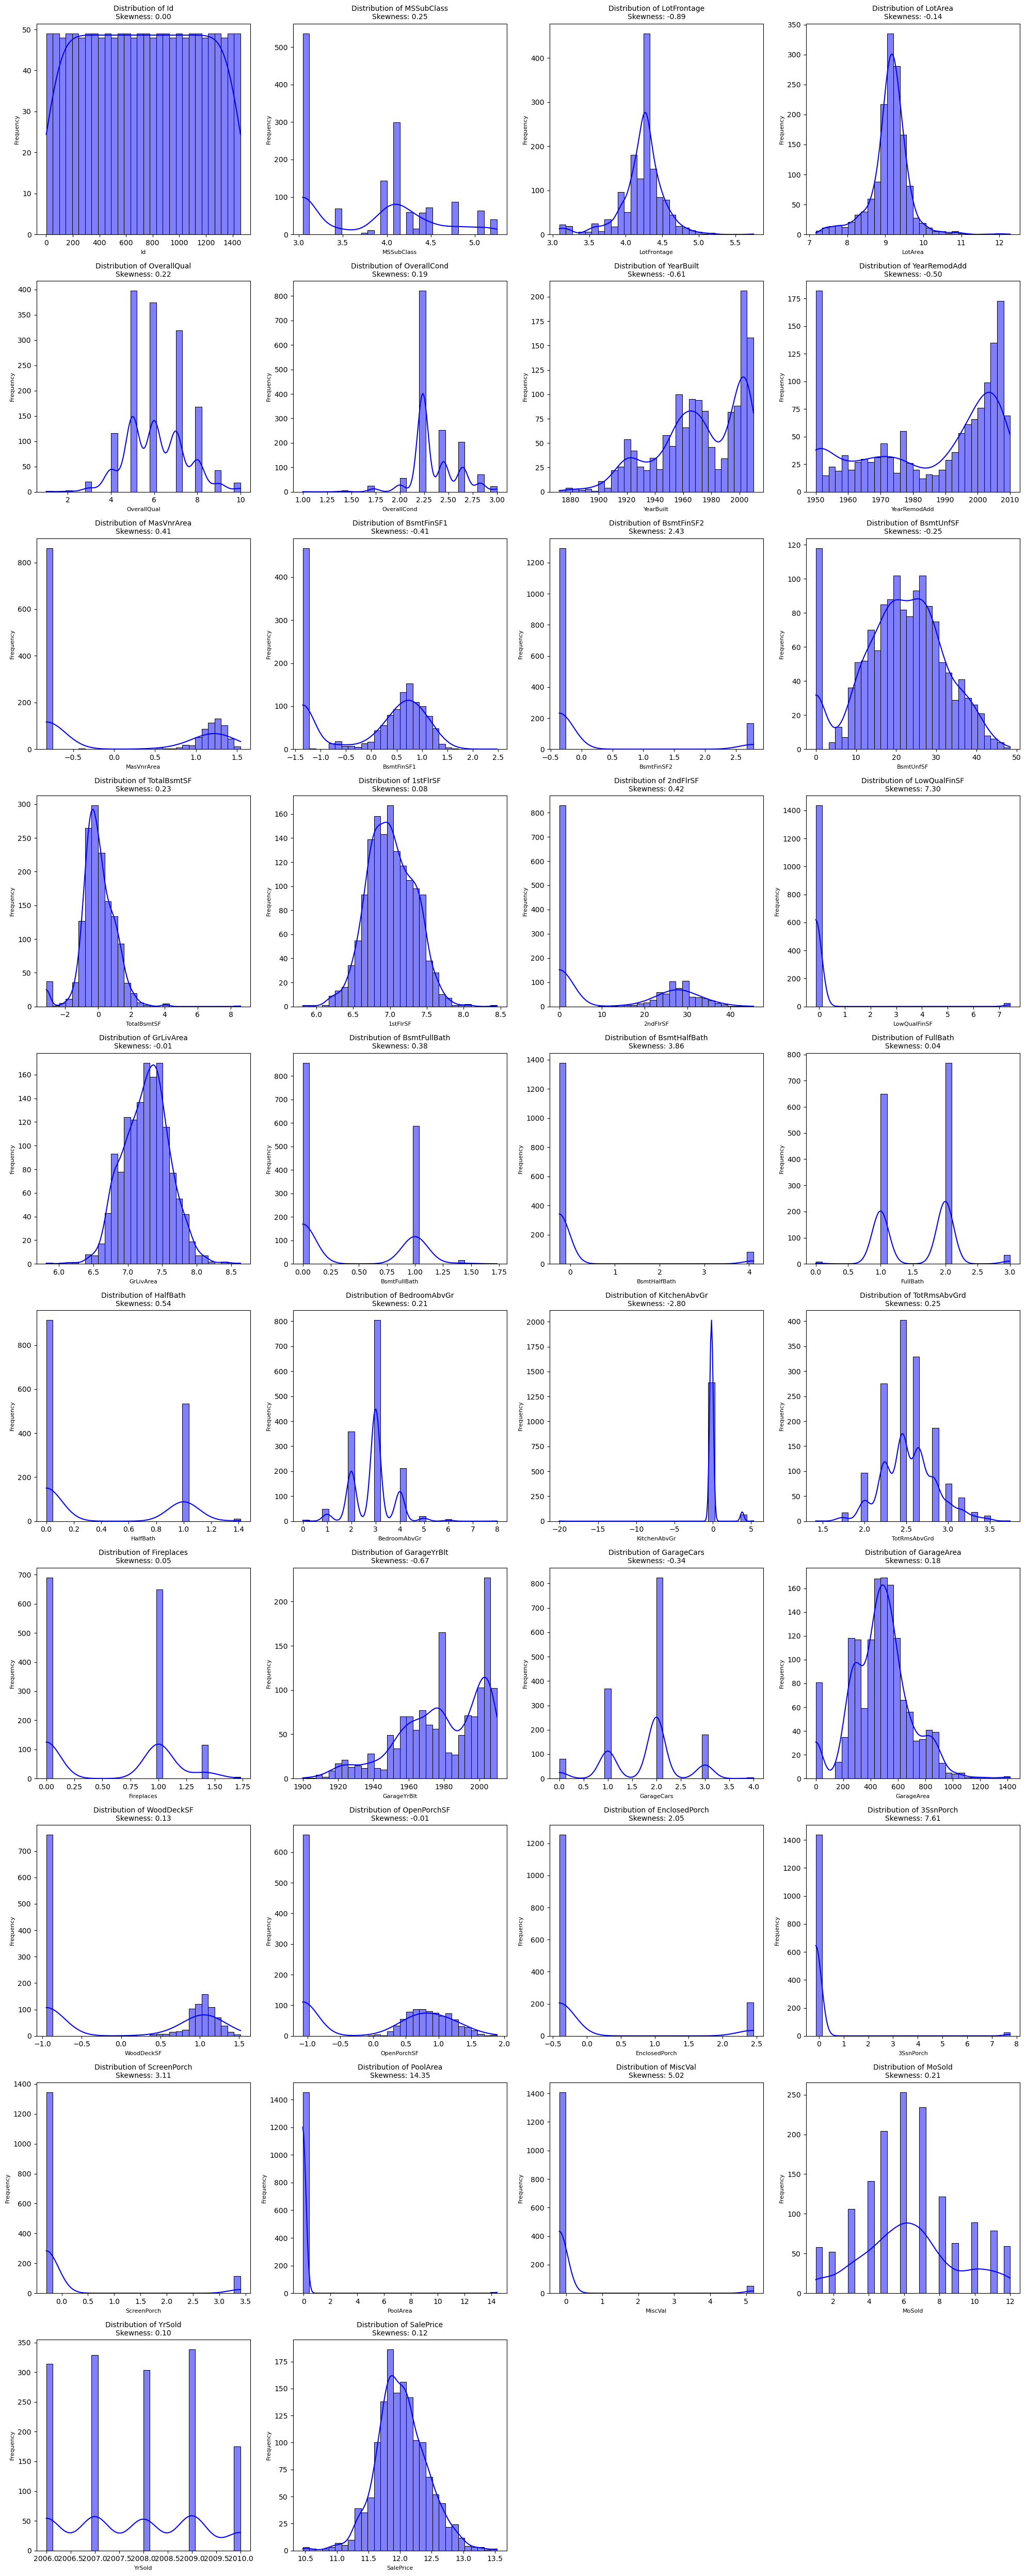

In [58]:
import matplotlib.pyplot as plt
import math

# Determine the number of rows and columns for subplots
n_cols = 4  # Number of columns in the grid
n_rows = math.ceil(len(num_col.columns) / n_cols)  # Calculate rows based on the number of columns

plt.figure(figsize=(20, n_rows * 5))  # Adjust figure size based on rows

# Create subplots for each column
plot = 1
for col in num_col.columns:
    plt.subplot(n_rows, n_cols, plot)  # Create a grid of n_rows x n_cols
    sns.histplot(num_col[col], kde=True, bins=30, color='blue')  # Plot distribution
    plt.title(f'Distribution of {col}\nSkewness: {num_col[col].skew():.2f}', fontsize=10)
    plt.xlabel(col, fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
    plot += 1

plt.tight_layout()  # Adjust spacing between plots
plt.show()

**Now most of the skewness is reduced**

### Encoding from categorical data to numerical data

In [61]:
cat_col

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal


In [62]:
# Get the number of unique values for each categorical column in cat_col
unique_values_cat_col = {col: cat_col[col].nunique() for col in cat_col.columns}

# Print the results
for col, count in unique_values_cat_col.items():
    print(f"Column: {col}, Unique Values: {count}")

Column: MSZoning, Unique Values: 5
Column: Street, Unique Values: 2
Column: LotShape, Unique Values: 4
Column: LandContour, Unique Values: 4
Column: Utilities, Unique Values: 2
Column: LotConfig, Unique Values: 5
Column: LandSlope, Unique Values: 3
Column: Neighborhood, Unique Values: 25
Column: Condition1, Unique Values: 9
Column: Condition2, Unique Values: 8
Column: BldgType, Unique Values: 5
Column: HouseStyle, Unique Values: 8
Column: RoofStyle, Unique Values: 6
Column: RoofMatl, Unique Values: 8
Column: Exterior1st, Unique Values: 15
Column: Exterior2nd, Unique Values: 16
Column: MasVnrType, Unique Values: 3
Column: ExterQual, Unique Values: 4
Column: ExterCond, Unique Values: 5
Column: Foundation, Unique Values: 6
Column: BsmtQual, Unique Values: 4
Column: BsmtCond, Unique Values: 4
Column: BsmtExposure, Unique Values: 4
Column: BsmtFinType1, Unique Values: 6
Column: BsmtFinType2, Unique Values: 6
Column: Heating, Unique Values: 6
Column: HeatingQC, Unique Values: 5
Column: Centr

In [63]:
# Initialize two lists to store columns based on unique values count
two_unique_values_cols = []
more_than_two_unique_values_cols = []

# Loop through each categorical column and check the number of unique values
for col in cat_col.columns:
    unique_count = cat_col[col].nunique()
    if unique_count == 2:
        two_unique_values_cols.append(col)  # Store columns with 2 unique values
    elif unique_count > 2:
        more_than_two_unique_values_cols.append(col)  # Store columns with more than 2 unique values

# Print the results
print("Columns with exactly 2 unique values:", two_unique_values_cols)
print("Columns with more than 2 unique values:", more_than_two_unique_values_cols)

Columns with exactly 2 unique values: ['Street', 'Utilities', 'CentralAir']
Columns with more than 2 unique values: ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [64]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Label Encoding for binary columns
label_encoder = LabelEncoder()
for col in two_unique_values_cols:
    cat_col[col] = label_encoder.fit_transform(cat_col[col])

# One-Hot Encoding for multi-class columns
cat_col_encoded = pd.get_dummies(cat_col[more_than_two_unique_values_cols])

# Combine both parts
cat_col_transformed = pd.concat([cat_col[two_unique_values_cols], cat_col_encoded], axis=1)

In [65]:
cat_col_transformed.shape

(1460, 235)

In [66]:
# Now concate the encoded categorical columns and numerical data
final_data = pd.concat([num_col, cat_col_encoded], axis=1)

# Display the concatenated DataFrame
print(final_data.head())

   Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0   1    4.110874     4.189655  9.042040            7     2.236068       2003   
1   2    3.044522     4.394449  9.169623            6     2.828427       1976   
2   3    4.110874     4.234107  9.328212            7     2.236068       2001   
3   4    4.262680     4.110874  9.164401            7     2.236068       1915   
4   5    4.110874     4.442651  9.565284            8     2.236068       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  SaleType_New  \
0          2003    1.218044    0.797537  ...           False         False   
1          1976   -0.827466    1.011471  ...           False         False   
2          2002    1.179948    0.571325  ...           False         False   
3          1970   -0.827466    0.142272  ...           False         False   
4          2000    1.324337    0.750541  ...           False         False   

   SaleType_Oth  SaleType_WD  SaleCondition_

In [67]:
final_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=270)

In [68]:
final_data.shape

(1460, 270)

## Feature Selection

In [70]:
correlation_matrix = final_data.corr()
correlation_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.014453,-0.016916,-0.017483,-0.028365,0.013586,-0.012713,-0.021998,-0.025437,-0.010083,...,-0.020738,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738
MSSubClass,0.014453,1.000000,-0.391599,-0.378062,0.078346,-0.037906,-0.002896,0.039769,0.010292,-0.099027,...,0.025715,-0.059117,-0.018826,0.047682,-0.000556,0.030662,0.043334,0.004400,0.033320,-0.066732
LotFrontage,-0.016916,-0.391599,1.000000,0.654004,0.204399,-0.028894,0.088381,0.058630,0.110768,0.090355,...,-0.055678,0.109670,-0.021851,-0.075491,-0.032352,-0.037766,-0.006839,0.007142,-0.053121,0.108490
LotArea,-0.017483,-0.378062,0.654004,1.000000,0.178220,-0.005697,0.021943,0.027672,0.060670,0.128176,...,-0.018765,0.058055,0.001182,-0.036542,-0.041525,-0.013797,0.016973,-0.004322,-0.018264,0.061604
OverallQual,-0.028365,0.078346,0.204399,0.178220,1.000000,-0.071911,0.572323,0.550684,0.406768,0.090503,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.034852,0.030662,-0.037766,-0.013797,-0.041677,-0.041806,-0.045601,-0.040294,-0.015960,-0.018230,...,-0.003073,-0.015827,-0.002378,0.020457,-0.014289,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,-0.009018,0.043334,-0.006839,0.016973,-0.044950,-0.034774,-0.010104,-0.020727,-0.012678,-0.003559,...,-0.005337,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.004865,0.004400,0.007142,-0.004322,-0.025515,-0.022843,-0.035785,-0.048056,0.007571,-0.028255,...,-0.006909,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.015881,0.033320,-0.053121,-0.018264,-0.143282,0.160027,-0.158427,-0.120577,-0.090605,0.080765,...,0.027414,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


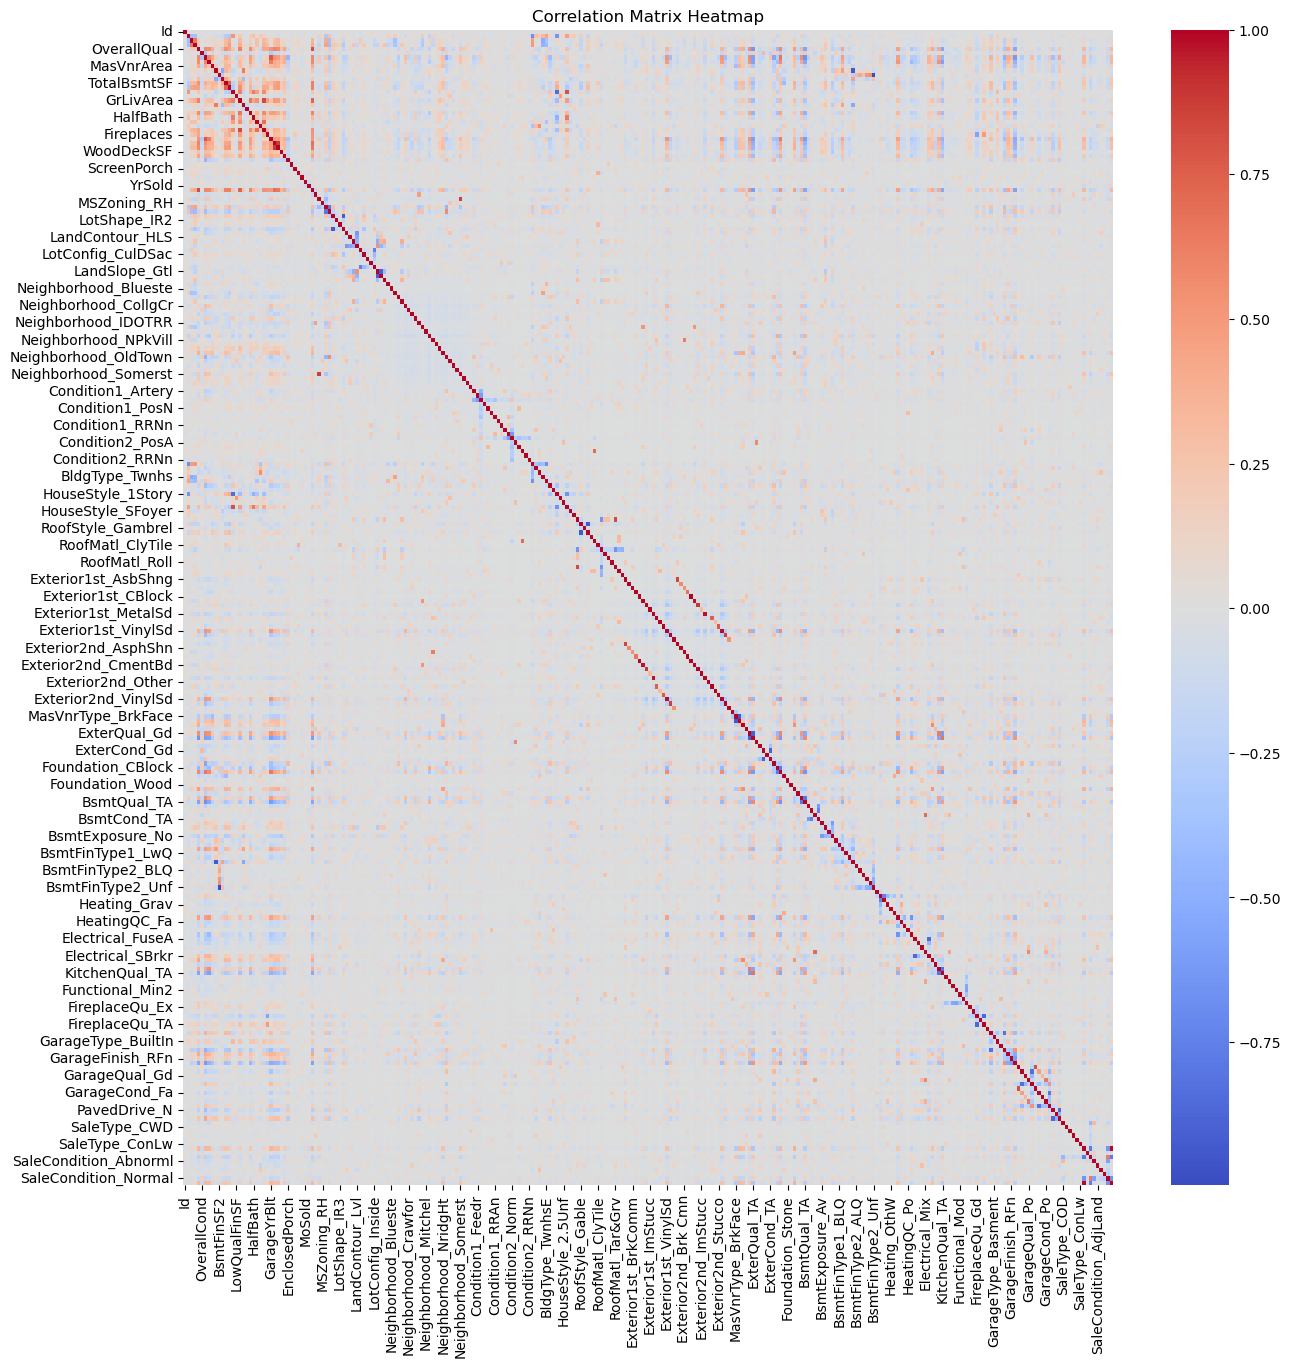

In [71]:
plt.figure(figsize=(15, 15))  # Adjust the figure size for better visualization
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

**Since there are no observed features with high mutual correlation, we will be considering all the independent features for our model creation**

**There is no use of unique value column in the data model process such as Id**

In [74]:
final_data.drop(['Id'],axis=1,inplace=True)

In [75]:
final_data.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,2.236068,2003,2003,1.218044,0.797537,-0.359384,...,False,False,False,True,False,False,False,False,True,False
1,3.044522,4.394449,9.169623,6,2.828427,1976,1976,-0.827466,1.011471,-0.359384,...,False,False,False,True,False,False,False,False,True,False


## Model Creation

**Splitting the dataset in x(input columns) and y(target columns)**

In [78]:
x=final_data.drop(['SalePrice'],axis=1)
y=final_data[['SalePrice']]

In [79]:
x.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,2.236068,2003,2003,1.218044,0.797537,-0.359384,...,False,False,False,True,False,False,False,False,True,False
1,3.044522,4.394449,9.169623,6,2.828427,1976,1976,-0.827466,1.011471,-0.359384,...,False,False,False,True,False,False,False,False,True,False


In [80]:
y.head(2)

,SalePrice
0,12.247699
1,12.109016


In [81]:
print("Shape of x=",x.shape)
print("Shape of y=",y.shape)

Shape of x= (1460, 268)
Shape of y= (1460, 1)


**Splitting x and y in training and testing formate**

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [84]:
print('shape of x_train',x_train.shape)
print('shape of x_test',x_test.shape)
print('shape of y_train',y_train.shape)
print('shape of y_test',y_test.shape)

shape of x_train (1168, 268)
shape of x_test (292, 268)
shape of y_train (1168, 1)
shape of y_test (292, 1)


### Scaling

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit and transform the training data, then transform the test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### PCA

In [88]:
from sklearn.decomposition import PCA

# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled) 

# Check the number of components retained
print("Number of Components:", pca.n_components_)


Number of Components: 166


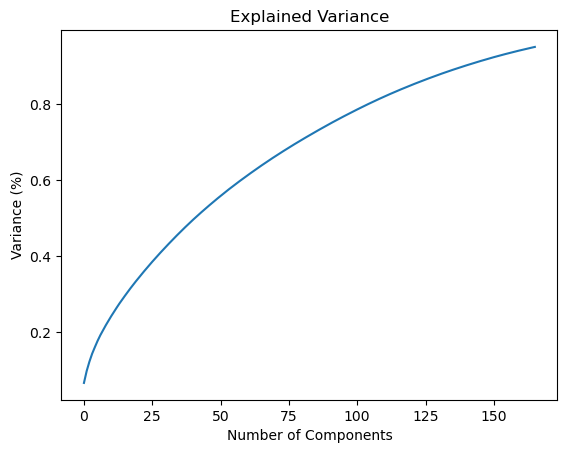

In [89]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # cumsum calculate the evr

plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [90]:
print('shape of x_train',x_train.shape)
print('shape of x_test',x_test.shape)
print('shape of y_train',y_train.shape)
print('shape of y_test',y_test.shape)
print('shape of x_train_scaled',x_train_scaled.shape)
print('shape of x_test_scaled',x_test_scaled.shape)
print('shape of x_train_pca',x_train_pca.shape)
print('shape of x_test_pca',x_test_pca.shape)

shape of x_train (1168, 268)
shape of x_test (292, 268)
shape of y_train (1168, 1)
shape of y_test (292, 1)
shape of x_train_scaled (1168, 268)
shape of x_test_scaled (292, 268)
shape of x_train_pca (1168, 166)
shape of x_test_pca (292, 166)


## Model Building and Evaluation

### Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression

# Define the model
model_lr = LinearRegression()

# Train the model (assuming scaled or PCA-reduced data)
model_lr.fit(x_train_pca, y_train)

# Predict on test set
y_pred_lr = model_lr.predict(x_test_pca)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression MSE: {mse_lr}')
print(f'Linear Regression R^2: {r2_lr}')

Linear Regression MSE: 0.019083522621874856
Linear Regression R^2: 0.8977363403614884


### KNN

In [95]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train a KNN model
knn_model = KNeighborsRegressor()

# Train using PCA-reduced data (or scaled data without PCA)
knn_model.fit(x_train_pca, y_train)

# Make predictions
y_pred_knn = knn_model.predict(x_test_pca)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f'KNN MSE: {mse_knn}')
print(f'KNN R^2: {r2_knn}')

KNN MSE: 0.03894182473393373
KNN R^2: 0.7913208379186375


### SVM

In [97]:
from sklearn.svm import SVR

# Initialize and train a Support Vector Machine model
svm_model = SVR()

# Train using PCA-reduced data (or scaled data without PCA)
svm_model.fit(x_train_pca, y_train)

# Make predictions
y_pred_svm = svm_model.predict(x_test_pca)

# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f'SVM MSE: {mse_svm}')
print(f'SVM R^2: {r2_svm}')

SVM MSE: 0.04443621648556867
SVM R^2: 0.761877814261895


### Random Forest

In [99]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train a Random Forest model
rf_model = RandomForestRegressor()

# Train using original features (no scaling/PCA needed)
rf_model.fit(x_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(x_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest R^2: {r2_rf}')

Random Forest MSE: 0.021573563881054494
Random Forest R^2: 0.8843928535818144


### Gradient Boosting

In [101]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the model
model_gbr = GradientBoostingRegressor()

# Train the model
model_gbr.fit(x_train, y_train)

# Predict on test set
y_pred_gbr = model_gbr.predict(x_test)

# Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f'Gradient Boosting MSE: {mse_gbr}')
print(f'Gradient Boosting R^2: {r2_gbr}')

Gradient Boosting MSE: 0.018291198496030354
Gradient Boosting R^2: 0.9019822003284458


### Neural Network

In [103]:
from sklearn.neural_network import MLPRegressor

# Define the model
model_nn = MLPRegressor(hidden_layer_sizes=(50,), max_iter=500, random_state=42)

# Train the model
model_nn.fit(x_train, y_train)

# Predict on test set
y_pred_nn = model_nn.predict(x_test)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f'Neural Networks MSE: {mse_nn}')
print(f'Neural Networks R^2: {r2_nn}')

Neural Networks MSE: 0.7729033235536854
Neural Networks R^2: -3.1417889128481677


### Lasso and Ridge

In [105]:
from sklearn.linear_model import Lasso, Ridge

# Define Lasso model
model_lasso = Lasso(alpha=0.1)

# Define Ridge model
model_ridge = Ridge(alpha=1.0)

# Train and evaluate Lasso
model_lasso.fit(x_train_pca, y_train)
y_pred_lasso = model_lasso.predict(x_test_pca)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Train and evaluate Ridge
model_ridge.fit(x_train_pca, y_train)
y_pred_ridge = model_ridge.predict(x_test_pca)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Lasso MSE: {mse_lasso}, R^2: {r2_lasso}')
print(f'Ridge MSE: {mse_ridge}, R^2: {r2_ridge}')

Lasso MSE: 0.039379135215841146, R^2: 0.788977404205468
Ridge MSE: 0.019080439295119562, R^2: 0.897752863111722


In [106]:
R2scores = [r2_score(y_test, y_pred_lr),r2_score(y_test, y_pred_knn),r2_score(y_test, y_pred_svm),r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_gbr),r2_score(y_test, y_pred_nn), r2_score(y_test, y_pred_ridge)]
algorithms = ["Linear Regression","K-NN","Support Vector Machine","Random Forest","Gradient Boosting","Neural Network","Lasso and Ridge"]    

for i in range(len(algorithms)):
    print("The R2 score achieved using "+algorithms[i]+" is: "+str(R2scores[i])+" %")

The R2 score achieved using Linear Regression is: 0.8977363403614884 %
The R2 score achieved using K-NN is: 0.7913208379186375 %
The R2 score achieved using Support Vector Machine is: 0.761877814261895 %
The R2 score achieved using Random Forest is: 0.8843928535818144 %
The R2 score achieved using Gradient Boosting is: 0.9019822003284458 %
The R2 score achieved using Neural Network is: -3.1417889128481677 %
The R2 score achieved using Lasso and Ridge is: 0.897752863111722 %


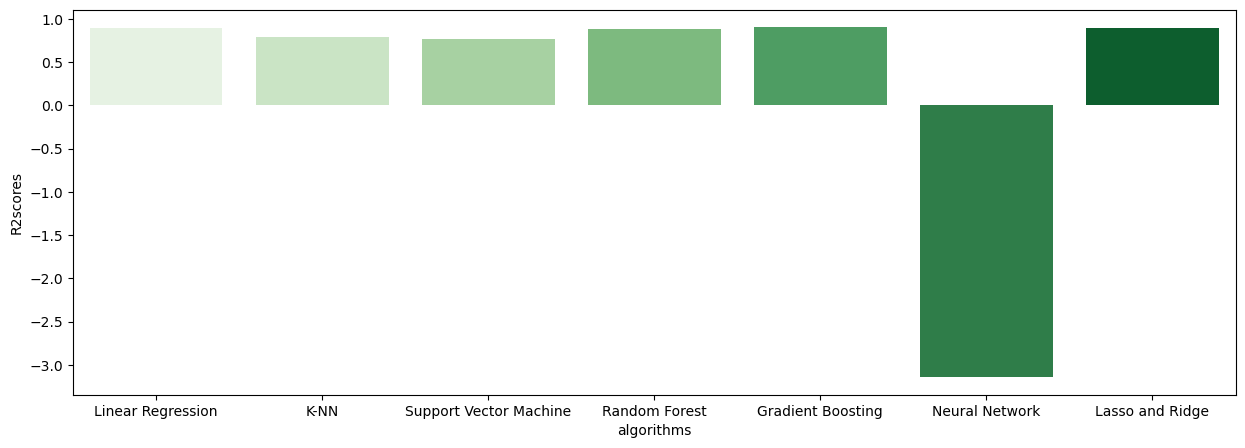

In [107]:
plt.figure(figsize=(15,5))
sns.barplot(x=algorithms, y=R2scores, palette='Greens')
plt.xlabel('algorithms')
plt.ylabel('R2scores')
plt.show()

## Conclusion

### In this house price prediction project, the Gradient Boosting Regressor has achieved a remarkable R² score of 0.90. This indicates that the model explains 90% of the variance in the target variable (house prices), which is an excellent result for a real-world regression problem. The project successfully demonstrates the ability of Gradient Boosting to handle complex relationships in the dataset and provide highly accurate price predictions based on various features.

## Challenges 

### The dataset involved 81 features, which introduced several challenges during the modeling process
1. High Dimensionality: With such a large number of features, it was crucial to carefully select relevant features to avoid overfitting and ensure generalization. Feature selection or dimensionality reduction (e.g., PCA) might have been considered, although Gradient Boosting handles high-dimensional data relatively well.

2. Handling Missing Data and Outliers: The dataset likely contained missing values and outliers, which needed to be addressed through imputation and outlier detection methods. Proper preprocessing ensured that the model did not suffer from skewed or unreliable data.

3. Feature Engineering: The large number of features meant that some features needed transformation or encoding (e.g., converting categorical variables into numerical ones) to improve model performance.
